# Combining & organizing data

## Libraries and settings

In [59]:
# Libraries
import os
import pandas as pd
import numpy as np
import fnmatch

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

c:\Users\Jasmin\Desktop\DA\data_analytics\Week_03


## Importing the prepared rental apartments data

In [60]:
# Read data to pandas data frame
df_orig = pd.read_csv('apartments_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
            'address_raw',
            'rooms', 
            'area', 
            'luxurious',
            'price',
            'price_per_m2']
df = df_orig[columns]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(865, 7)


,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,0,4853.0,89.87
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84


## Combining data from different sources

### Reading rental apartment data with geocoded addresses

In [61]:
# Meaning of variables
# lat: geographical latitude
# lon: geographical longitude
# bfs_number: official municipality id
# bfs_name: official municipality name

# Geocoded data (i.e. data with latitude and longitude)
df_geo = pd.read_csv('apartments_data_geocoded.csv', 
                     sep=',', 
                     encoding='utf-8')

# Rename columns
df_geo = df_geo.rename(columns={'web-scrape':'web-scraper-order',
                                'address_ra':'address_raw',
                                'BFS_NUMMER':'bfs_number', 
                                'NAME':'bfs_name'})

# Show data
df_geo[['web-scraper-order',
        'address_raw',
        'lat', 
        'lon', 
        'bfs_number', 
        'bfs_name']].head()

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",47.407925,8.392561,243,Dietikon


### Join geo-information to rental apartment data using .merge()

In [62]:
df2 = df.merge(df_geo[['web-scraper-order', 
                       'lat', 
                       'lon', 
                       'bfs_number', 
                       'bfs_name']], 
               on="web-scraper-order")
df2.head()

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41,47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46,47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47,47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84,47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3.5,105.0,0,3200.0,30.48,47.407925,8.392561,243,Dietikon


### Reading municipality-level data

In [63]:
# Meaning of variables:
# bfs_number: official municipality id
# bfs_name: official municipality name
# pop: number of residents (=population)
# pop_dens: population density (pop per km2)
# frg_pct: percentage foreigners
# emp: numer of employees



df_municip = pd.read_excel('municipality_data.xlsx', 
                           sheet_name='data_for_import')
df_municip.head(5)

,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
0,1,Aeugst am Albis,1981,250.442478,14.184755,442.0,105013.570634
1,2,Affoltern am Albis,12303,1161.756374,28.700317,6920.0,71059.805603
2,3,Bonstetten,5572,749.932705,16.564968,1014.0,88927.698145
3,4,Hausen am Albis,3751,275.808824,16.022394,1021.0,86300.455137
4,5,Hedingen,3778,578.560490,16.410799,1478.0,90811.205330


### Join municipality data to rental apartment data using .merge()

In [64]:
# Merge needs a key which must be identical in both data sets (here the key is 'bfs_number')
df3 = df2.merge(df_municip[['bfs_number', 
                            'pop', 
                            'pop_dens', 
                            'frg_pct', 
                            'emp',
                            'mean_taxable_income'
                            ]], 
                on="bfs_number")

df3.head(5)

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111.0,0,2600.0,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58.0,0,1490.0,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118.0,0,3240.0,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66.0,0,1450.0,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,65362.042683


### Export data to file

In [65]:
# Remove missing values which may have ocured from the merging process
df3 = df3.dropna()

# Check for missing values per column
print(df3.isna().sum())

# Count number of rows and columns
print(df3.shape)

# Export apartment data to file
df3.to_csv('apartments_data_enriched.csv',
            sep=',',
            encoding='utf-8')

web-scraper-order      0
address_raw            0
rooms                  0
area                   0
luxurious              0
price                  0
price_per_m2           0
lat                    0
lon                    0
bfs_number             0
bfs_name               0
pop                    0
pop_dens               0
frg_pct                0
emp                    0
mean_taxable_income    0
dtype: int64
(786, 16)


### Sorting data

In [66]:
# Sorting data by 'price' and 'area' with highest price above (ascending=False)
df3.sort_values(by=['price', 'area'], 
                ascending=False).head()

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
85,1693998265-365,"Gustav-Gull-Platz 4, 8004 Zürich, ZH",4.5,140.0,0,9950.0,71.07,47.379471,8.531120,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
86,1693998265-366,"Engweg 8, 8006 Zürich, ZH",4.5,140.0,0,9170.0,65.50,47.385265,8.537632,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
46,1693998236-207,"Etzelstrasse 35, 8038 Zürich, ZH",3.5,100.0,1,9150.0,91.50,47.346546,8.530695,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
44,1693998236-197,"Utoquai 37, 8008 Zürich, ZH",3.5,169.0,0,9000.0,53.25,47.363682,8.546781,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
117,1693998285-475,"Universitätstrasse 41, 8006 Zürich, ZH",4.5,140.0,0,8990.0,64.21,47.380440,8.547943,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704


### Aggregation of data

In [67]:
# Aggregation using .groupby()
df3[['rooms', 'price']].groupby(['rooms']).mean()

,price
rooms,
1.0,1306.346154
1.5,2110.166667
2.0,2155.846154
2.5,2423.468085
3.0,1964.022727
3.5,2699.044335
4.0,2852.357143
4.5,3067.847561
5.0,2881.666667


## Reshaping data

### Reshaping data using .stack() and .unstack()

In [68]:
df_sub = df3[['bfs_name', 'rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

df_sub_stacked = df_sub.stack()
print('Stacked')
print(df_sub_stacked, '\n')

# Using unstack
print('Unstacked (= back to original shape)')
print(df_sub_stacked.unstack())

Original shape
    bfs_name  rooms   price   area
0  Rüti (ZH)    3.0  1441.0   49.0
1  Rüti (ZH)    3.0  2600.0  111.0
2  Rüti (ZH)    3.0  1490.0   58.0
3  Rüti (ZH)    4.0  3240.0  118.0
4  Rüti (ZH)    3.0  1450.0   66.0 

Stacked
0  bfs_name    Rüti (ZH)
   rooms             3.0
   price          1441.0
   area             49.0
1  bfs_name    Rüti (ZH)
   rooms             3.0
   price          2600.0
   area            111.0
2  bfs_name    Rüti (ZH)
   rooms             3.0
   price          1490.0
   area             58.0
3  bfs_name    Rüti (ZH)
   rooms             4.0
   price          3240.0
   area            118.0
4  bfs_name    Rüti (ZH)
   rooms             3.0
   price          1450.0
   area             66.0
dtype: object 

Unstacked (= back to original shape)
    bfs_name rooms   price   area
0  Rüti (ZH)   3.0  1441.0   49.0
1  Rüti (ZH)   3.0  2600.0  111.0
2  Rüti (ZH)   3.0  1490.0   58.0
3  Rüti (ZH)   4.0  3240.0  118.0
4  Rüti (ZH)   3.0  1450.0   66.0


### Reshaping data using .melt()

In [69]:
df_sub = df3[['rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

print('Reshaped using .melt()')
print(pd.melt(df, id_vars=['rooms'], value_vars=['price', 'area']))

Original shape
   rooms   price   area
0    3.0  1441.0   49.0
1    3.0  2600.0  111.0
2    3.0  1490.0   58.0
3    4.0  3240.0  118.0
4    3.0  1450.0   66.0 

Reshaped using .melt()
      rooms variable   value
0       3.0    price  1441.0
1       3.5    price  1850.0
2       2.0    price  4853.0
3       2.0    price  4335.0
4       2.0    price  3515.0
...     ...      ...     ...
1725    3.5     area    82.0
1726    4.0     area    73.0
1727    4.5     area   110.0
1728    3.0     area    68.0
1729    4.5     area   114.0

[1730 rows x 3 columns]


### Pivoting data using .pivot_table()

In [70]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df3[['rooms', 'price', 'area', 'price_per_m2']],
               index=['rooms'],
               values=['price', 'area', 'price_per_m2'],
               aggfunc=(np.mean))

,area,price,price_per_m2
rooms,,,
1.0,32.057692,1306.346154,50.168077
1.5,35.333333,2110.166667,65.455000
2.0,54.589744,2155.846154,42.528462
2.5,67.028369,2423.468085,37.391631
3.0,68.159091,1964.022727,28.677955
3.5,89.945813,2699.044335,29.942956
4.0,98.464286,2852.357143,29.646429
4.5,115.060976,3067.847561,26.332622
5.0,108.000000,2881.666667,26.376667


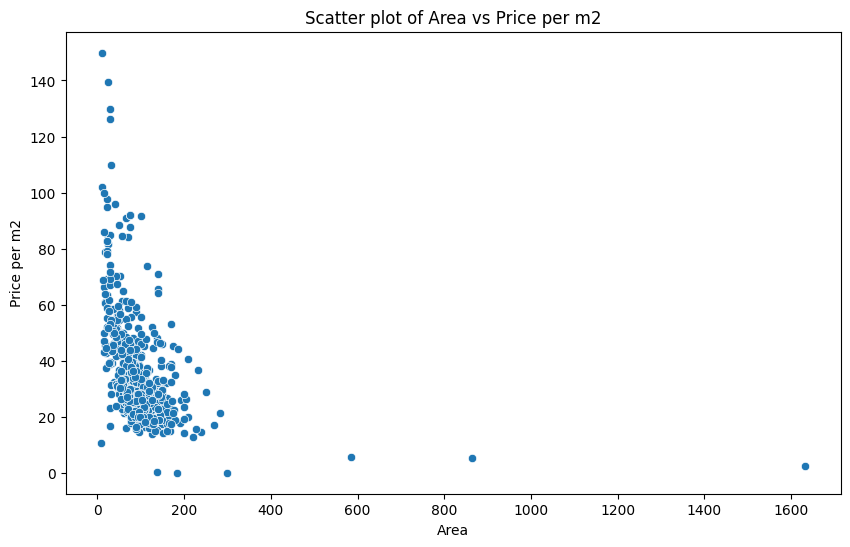

Correlation coefficient between area and price_per_m2: -0.33281298457016734

The scatter plot above shows the relationship between the area and the price per square meter (price_per_m2). 
The correlation coefficient is -0.33, which indicates a moderate relationship between the two variables. 
A positive correlation would suggest that as the area increases, the price per square meter also increases, 
while a negative correlation would suggest the opposite. 
In this case, the correlation coefficient suggests that there is a negative relationship between area and price_per_m2.



In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price_per_m2', data=df3)
plt.title('Scatter plot of Area vs Price per m2')
plt.xlabel('Area')
plt.ylabel('Price per m2')
plt.show()

# Calculate the correlation coefficient
correlation = df3['area'].corr(df3['price_per_m2'])
print(f'Correlation coefficient between area and price_per_m2: {correlation}')

# Explanation
explanation = """
The scatter plot above shows the relationship between the area and the price per square meter (price_per_m2). 
The correlation coefficient is {:.2f}, which indicates {} relationship between the two variables. 
A positive correlation would suggest that as the area increases, the price per square meter also increases, 
while a negative correlation would suggest the opposite. 
In this case, the correlation coefficient suggests that there is a {} relationship between area and price_per_m2.
""".format(correlation, 
           'a strong' if abs(correlation) > 0.7 else 'a moderate' if abs(correlation) > 0.3 else 'a weak', 
           'positive' if correlation > 0 else 'negative')

print(explanation)

In [94]:
# Erstellen der Pivot-Tabelle mit Count und Durchschnitt
pivot_table = pd.pivot_table(df3, 
                               index='rooms', 
                               aggfunc={
                                   'rooms': 'count'
                               })

# Anzeigen der Pivot-Tabelle
print(pivot_table)

# Beschreibung
description = """
The pivot table above shows the distribution of the number of apartments based on the number of rooms.
Each cell represents the count of apartments for the corresponding number of rooms.
This helps in understanding how apartment counts vary across different room categories.
"""
print(description)


       rooms
rooms       
1.0       52
1.5       36
2.0       39
2.5      141
3.0       44
3.5      203
4.0       28
4.5      164
5.0        3
5.5       53
6.0        3
6.5       14
7.0        2
7.5        3
8.5        1

The pivot table above shows the distribution of the number of apartments based on the number of rooms.
Each cell represents the count of apartments for the corresponding number of rooms.
This helps in understanding how apartment counts vary across different room categories.



In [100]:
# add municipality column
df3['municipality'] = df3['bfs_name']


# Create a pivot table with mean values per municipality
pivot_mean = pd.pivot_table(df3, 
                            index='municipality', 
                            values=['rooms', 'area', 'price', 'price_per_m2'], 
                            aggfunc=np.mean)

# Sort the pivot table by price and area
pivot_mean_sorted = pivot_mean.sort_values(by=['price', 'area'], ascending=False)

# Display the pivot table
print(pivot_mean_sorted)


                      area        price  price_per_m2  rooms
municipality                                                
Rüschlikon      144.000000  6660.000000     46.250000    4.5
Küsnacht (ZH)   136.333333  4891.666667     35.476667    4.5
Nürensdorf      506.500000  4500.000000     17.605000    6.0
Maur            138.500000  4250.000000     30.445000    4.5
Obfelden        127.500000  4095.000000     31.910000    5.5
...                    ...          ...           ...    ...
Weiningen (ZH)   73.333333  1606.666667     20.716667    3.0
Dättlikon        90.000000  1480.000000     16.440000    4.0
Weiach           46.000000  1420.000000     30.870000    1.5
Herrliberg       18.000000  1150.000000     63.890000    1.0
Uetikon am See  300.000000    11.000000      0.040000    6.5

[104 rows x 4 columns]

The pivot table above shows the mean values of rooms, area, price, and price per square meter (price_per_m2) 
for each municipality. The table is sorted by price and area, with the m

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [22]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-10-27 11:14:03
Python Version: 3.12.0
-----------------------------------
